# Install Packages

# Import Libraries

In [0]:
import pandas as pd
import numpy as np

#Data viz
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import warnings

import pandas as pd
import numpy as np

#Data prep
import sklearn
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



from sklearn import linear_model

from sklearn.model_selection import GridSearchCV

# Data Ingestion

In [0]:
data_path = '/Workspace/Users/rofhiwanemukula1998@gmail.com/Patient Readmission Analysis/Expanded_Patient_Readmission_Data (1).csv'

In [0]:
# To read the data from a csv file to a pandas DataFrame
df=pd.read_csv(data_path)

In [0]:
# Pandas to help us to see the first 10 rows of the data
df.head(10)

,Patient ID,Age,Gender,Admission Type,Length of Stay,Number of Diagnoses,Blood Pressure,Blood Sugar Levels,Previous Admissions,Readmission
0,1,62,Female,Elective,4,5,110,130,1,No
1,2,65,Male,Emergency,19,2,157,81,4,No
2,3,82,Female,Emergency,18,4,74,84,0,No
3,4,85,Male,Emergency,2,4,106,85,4,No
4,5,85,Female,Elective,19,3,80,119,3,No
5,6,27,Male,Emergency,18,6,136,99,2,No
6,7,39,Male,Elective,21,3,116,74,0,Yes
7,8,54,Male,Emergency,3,4,136,68,3,No
8,9,88,Female,Elective,6,6,120,81,2,No
9,10,30,Male,Elective,6,8,139,106,3,No


# EDA 

#### Step 1: Understand the Data Structure 

In [0]:
# To check the number of rows and number of columns of the data
df.shape

(3000, 10)

In [0]:
df.columns

Index(['Patient ID', 'Age', 'Gender', 'Admission Type', 'Length of Stay',
       'Number of Diagnoses', 'Blood Pressure', 'Blood Sugar Levels',
       'Previous Admissions', 'Readmission'],
      dtype='object')

In [0]:
# Checking the Data Types
df.dtypes

Patient ID              int64
Age                     int64
Gender                 object
Admission Type         object
Length of Stay          int64
Number of Diagnoses     int64
Blood Pressure          int64
Blood Sugar Levels      int64
Previous Admissions     int64
Readmission            object
dtype: object

### Observation
- Categorical Columns: Gender, Admission Type, Readmission 
- Numerical Columns: Patient ID', 'Age', 'Length of Stay','Number of Diagnoses', 'Blood Pressure', 'Blood Sugar Levels','Previous Admissions'

In [0]:
# It helps us to select catagorical columns from our data using its datatype 
print("Categorical Columns:", list(df.select_dtypes(include=['object']).columns))

Categorical Columns: ['Gender', 'Admission Type', 'Readmission']


In [0]:
# It helps us to select numerical columns from our data using its datatype 
print("Numerical Columns:", list(df.select_dtypes(include=['int64']).columns))

Numerical Columns: ['Patient ID', 'Age', 'Length of Stay', 'Number of Diagnoses', 'Blood Pressure', 'Blood Sugar Levels', 'Previous Admissions']


#### Step 2: Check the data quality

In [0]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [0]:
# Count the number of rows that are duplicated in your data
df.duplicated().sum()

np.int64(0)

In [0]:
# Checking the number of Null values in our dataset
df.isnull().sum()

Patient ID             0
Age                    0
Gender                 0
Admission Type         0
Length of Stay         0
Number of Diagnoses    0
Blood Pressure         0
Blood Sugar Levels     0
Previous Admissions    0
Readmission            0
dtype: int64

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient ID           3000 non-null   int64 
 1   Age                  3000 non-null   int64 
 2   Gender               3000 non-null   object
 3   Admission Type       3000 non-null   object
 4   Length of Stay       3000 non-null   int64 
 5   Number of Diagnoses  3000 non-null   int64 
 6   Blood Pressure       3000 non-null   int64 
 7   Blood Sugar Levels   3000 non-null   int64 
 8   Previous Admissions  3000 non-null   int64 
 9   Readmission          3000 non-null   object
dtypes: int64(7), object(3)
memory usage: 234.5+ KB


In [0]:
# Visual inspection for checking impoosible values
display(df)

Patient ID,Age,Gender,Admission Type,Length of Stay,Number of Diagnoses,Blood Pressure,Blood Sugar Levels,Previous Admissions,Readmission
1,62,Female,Elective,4,5,110,130,1,No
2,65,Male,Emergency,19,2,157,81,4,No
3,82,Female,Emergency,18,4,74,84,0,No
4,85,Male,Emergency,2,4,106,85,4,No
5,85,Female,Elective,19,3,80,119,3,No
6,27,Male,Emergency,18,6,136,99,2,No
7,39,Male,Elective,21,3,116,74,0,Yes
8,54,Male,Emergency,3,4,136,68,3,No
9,88,Female,Elective,6,6,120,81,2,No
10,30,Male,Elective,6,8,139,106,3,No


In [0]:
# Assume your DataFrame is called df and the column is 'age'

negative_mask = df['Age'] < 0

if negative_mask.any():
    
    # Show rows where age is negative
    negative_rows = df[negative_mask]
    print("Rows with negative ages:")
    print(negative_rows)
else:
    print("No rows in the 'Age' column have negative values.")


No rows in the 'Age' column have negative values.


### Step 3: Describe Each Column

#### Describe Numerical Columns

In [0]:
df.describe()


,Patient ID,Age,Length of Stay,Number of Diagnoses,Blood Pressure,Blood Sugar Levels,Previous Admissions
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,53.453000,15.226333,4.956667,119.058000,133.536000,1.958333
std,866.169729,20.892996,8.264858,2.575073,34.089265,37.626311,1.401637
min,1.000000,18.000000,1.000000,1.000000,60.000000,51.000000,0.000000
25%,750.750000,35.000000,8.000000,3.000000,89.750000,101.000000,1.000000
50%,1500.500000,53.000000,15.000000,5.000000,119.000000,133.000000,2.000000
75%,2250.250000,72.000000,22.000000,7.000000,147.250000,167.000000,3.000000
max,3000.000000,89.000000,29.000000,9.000000,179.000000,199.000000,4.000000


#### Describe Categorical Columns

In [0]:
# Checking the unique values in the 'Readmission' column
print(df['Readmission'].unique())
print(df['Gender'].unique())
print(df['Admission Type'].unique())

['No' 'Yes']
['Female' 'Male']
['Elective' 'Emergency']


In [0]:
# This give us the number(count) of different values in the readmission column
print(df['Readmission'].nunique())
print(df['Gender'].nunique())
print(df['Admission Type'].nunique())

2
2
2


In [0]:
# Shows you the unique values in the readmission column and the number of times they appear
df['Readmission'].value_counts()

Readmission
No     2134
Yes     866
Name: count, dtype: int64

In [0]:
# Shows you the unique values in the Gender column and the number of times they appear
df['Gender'].value_counts()

Gender
Male      1555
Female    1445
Name: count, dtype: int64

In [0]:
# Shows you the unique values in the Gender column and the number of times they appear
df['Admission Type'].value_counts()

Admission Type
Elective     1563
Emergency    1437
Name: count, dtype: int64

### Step 4: Visualize Single Variables

#### Univariate Analysis

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Plotting the distribution of the 'Age' column

In [0]:
fig = px.histogram(df, x="Gender")
fig.show()

In [0]:
fig = px.histogram(df, x="Readmission")
fig.show()

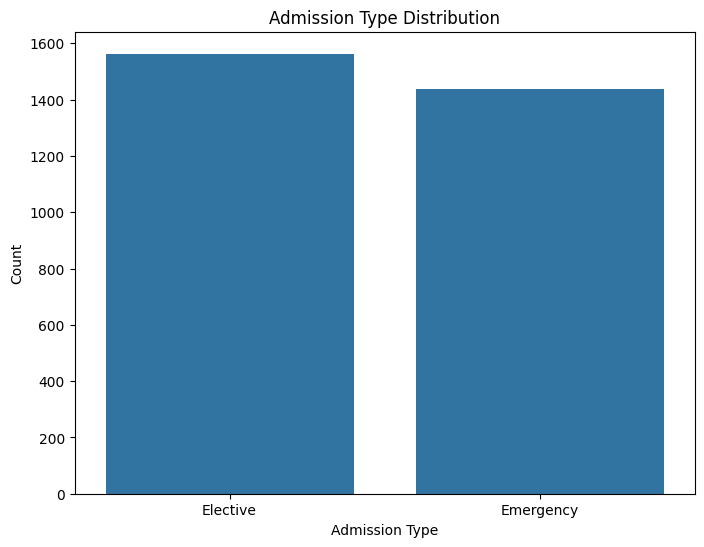

In [0]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Admission Type")
plt.title("Admission Type Distribution")
plt.xlabel("Admission Type")
plt.ylabel("Count")
plt.show()

In [0]:
fig = px.histogram(df, x="Admission Type")
fig.show()

In [0]:
fig = px.pie(df, names="Admission Type", title="Admission Type Distribution")
fig.show()

## Step 5: Explore relationships between variables 

#### Bivariate/Multivariate Analysis

In [0]:
df.head(3)

,Patient ID,Age,Gender,Admission Type,Length of Stay,Number of Diagnoses,Blood Pressure,Blood Sugar Levels,Previous Admissions,Readmission
0,1,62,Female,Elective,4,5,110,130,1,No
1,2,65,Male,Emergency,19,2,157,81,4,No
2,3,82,Female,Emergency,18,4,74,84,0,No


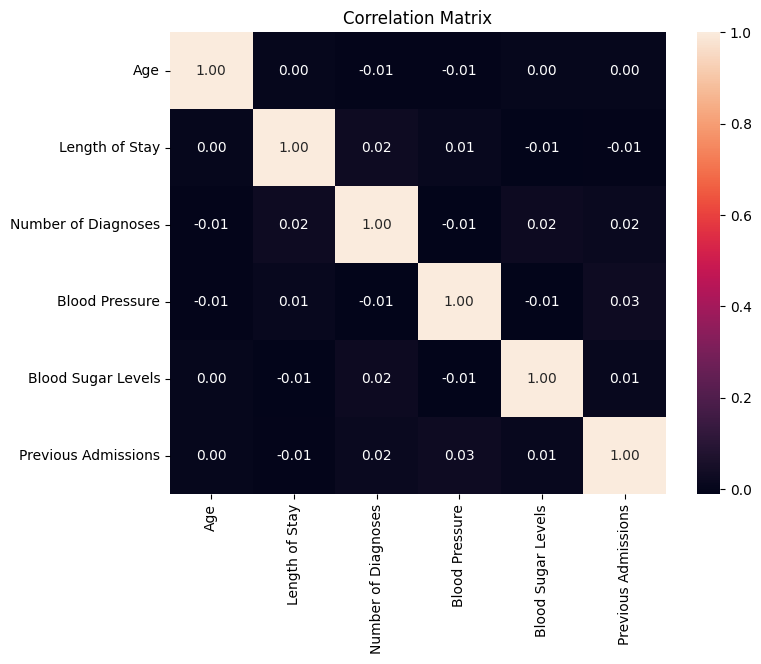

In [0]:

import seaborn as sns
import matplotlib.pyplot as plt

cols = ['Age', 'Length of Stay', 'Number of Diagnoses', 'Blood Pressure', 'Blood Sugar Levels', 'Previous Admissions']
corr_matrix = df[cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [0]:
# import plotly.express as px

# fig = px.scatter(
#     df,
#     x="Blood Pressure",
#     y="Blood Sugar Levels",
#     color="Readmission",
#     hover_name="Patient ID",x
#     size_max=60, 
# )
# fig.show()

#### Feature Engineering

Encoding our categorical columns

In [0]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

target_col = 'Readmission'
y = df[target_col]
X_raw = df.drop(columns=[target_col])

categorical_cols = X_raw.select_dtypes(include='object').columns
numeric_cols = X_raw.columns.difference(categorical_cols)

ohe = OneHotEncoder(
    handle_unknown='ignore',
    sparse_output=False  # Ensures output is a dense array
)

encoded_array = ohe.fit_transform(X_raw[categorical_cols])
encoded_feature_names = ohe.get_feature_names_out(categorical_cols)

encoded_df = pd.DataFrame(
    encoded_array,
    columns=encoded_feature_names,
    index=df.index
)

numeric_df = X_raw[numeric_cols]

X = pd.concat([numeric_df, encoded_df], axis=1)

display(X.head())
display(y.head())

Age,Blood Pressure,Blood Sugar Levels,Length of Stay,Number of Diagnoses,Patient ID,Previous Admissions,Gender_Female,Gender_Male,Admission Type_Elective,Admission Type_Emergency
62,110,130,4,5,1,1,1.0,0.0,1.0,0.0
65,157,81,19,2,2,4,0.0,1.0,0.0,1.0
82,74,84,18,4,3,0,1.0,0.0,0.0,1.0
85,106,85,2,4,4,4,0.0,1.0,0.0,1.0
85,80,119,19,3,5,3,1.0,0.0,1.0,0.0


0    No
1    No
2    No
3    No
4    No
Name: Readmission, dtype: object

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,      # 20% test, 80% train
    random_state=42,    # for reproducibility
    stratify=y          # optional but good for classification
)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(2400, 11) (600, 11)
(2400,) (600,)


### Model Training

Training Logistic Regression:

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

          No       0.71      1.00      0.83       427
         Yes       0.00      0.00      0.00       173

    accuracy                           0.71       600
   macro avg       0.36      0.50      0.42       600
weighted avg       0.51      0.71      0.59       600

Confusion Matrix (raw values):
[[427   0]
 [173   0]]
--------------------------------------------------


/databricks/python/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



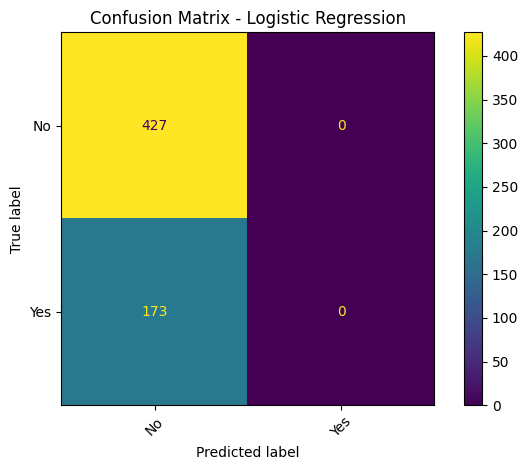

Training Decision Tree:

Classification Report for Decision Tree:
              precision    recall  f1-score   support

          No       0.71      0.73      0.72       427
         Yes       0.29      0.28      0.28       173

    accuracy                           0.60       600
   macro avg       0.50      0.50      0.50       600
weighted avg       0.59      0.60      0.59       600

Confusion Matrix (raw values):
[[310 117]
 [125  48]]
--------------------------------------------------


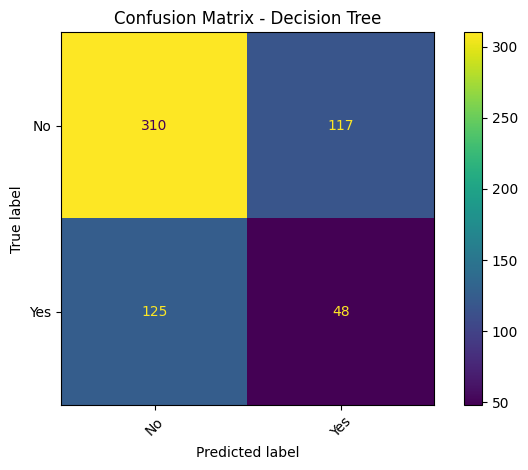

Training Random Forest:

Classification Report for Random Forest:
              precision    recall  f1-score   support

          No       0.71      0.98      0.82       427
         Yes       0.17      0.01      0.02       173

    accuracy                           0.70       600
   macro avg       0.44      0.49      0.42       600
weighted avg       0.55      0.70      0.59       600

Confusion Matrix (raw values):
[[417  10]
 [171   2]]
--------------------------------------------------


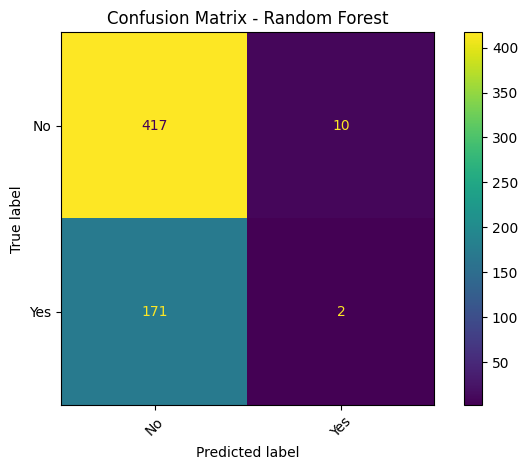

Training Support Vector Classifier:

Classification Report for Support Vector Classifier:
              precision    recall  f1-score   support

          No       0.71      1.00      0.83       427
         Yes       0.00      0.00      0.00       173

    accuracy                           0.71       600
   macro avg       0.36      0.50      0.42       600
weighted avg       0.51      0.71      0.59       600

Confusion Matrix (raw values):
[[427   0]
 [173   0]]
--------------------------------------------------


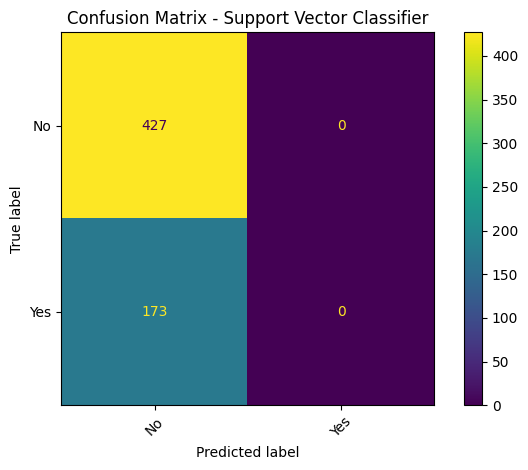

Training K-Nearest Neighbors:

Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

          No       0.71      0.87      0.78       427
         Yes       0.27      0.12      0.16       173

    accuracy                           0.65       600
   macro avg       0.49      0.49      0.47       600
weighted avg       0.58      0.65      0.60       600

Confusion Matrix (raw values):
[[372  55]
 [153  20]]
--------------------------------------------------


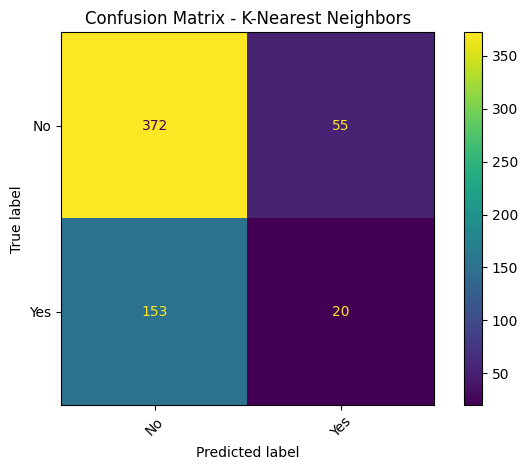

Training Naive Bayes:

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

          No       0.71      1.00      0.83       427
         Yes       0.00      0.00      0.00       173

    accuracy                           0.71       600
   macro avg       0.36      0.50      0.42       600
weighted avg       0.51      0.71      0.59       600

Confusion Matrix (raw values):
[[427   0]
 [173   0]]
--------------------------------------------------


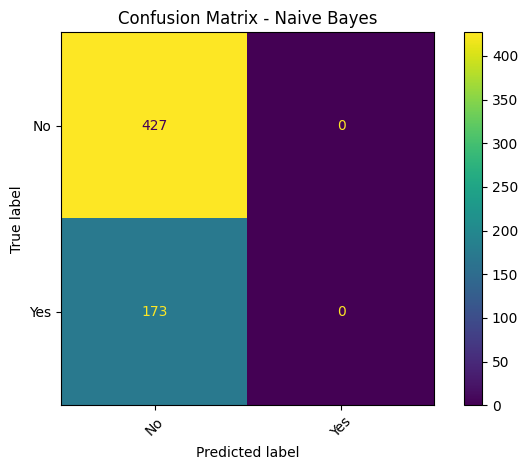

Training Gradient Boosting:

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

          No       0.71      0.98      0.82       427
         Yes       0.31      0.02      0.04       173

    accuracy                           0.70       600
   macro avg       0.51      0.50      0.43       600
weighted avg       0.60      0.70      0.60       600

Confusion Matrix (raw values):
[[418   9]
 [169   4]]
--------------------------------------------------


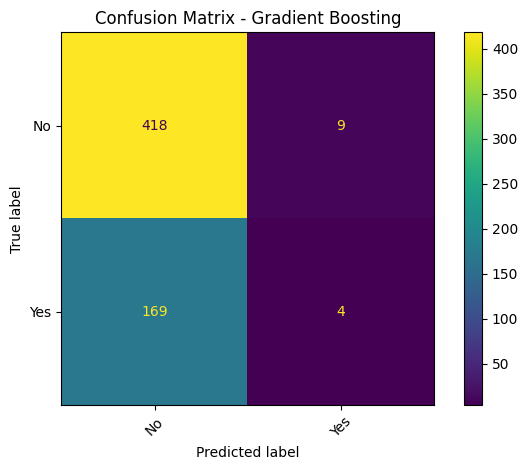


Overall Evaluation Results:

Logistic Regression
  Accuracy: 0.7117
  Precision: 0.5065
  Recall: 0.7117
  F1 Score: 0.5918

Decision Tree
  Accuracy: 0.5967
  Precision: 0.5910
  Recall: 0.5967
  F1 Score: 0.5938

Random Forest
  Accuracy: 0.6983
  Precision: 0.5528
  Recall: 0.6983
  F1 Score: 0.5910

Support Vector Classifier
  Accuracy: 0.7117
  Precision: 0.5065
  Recall: 0.7117
  F1 Score: 0.5918

K-Nearest Neighbors
  Accuracy: 0.6533
  Precision: 0.5812
  Recall: 0.6533
  F1 Score: 0.6027

Naive Bayes
  Accuracy: 0.7117
  Precision: 0.5065
  Recall: 0.7117
  F1 Score: 0.5918

Gradient Boosting
  Accuracy: 0.7033
  Precision: 0.5955
  Recall: 0.7033
  F1 Score: 0.5991


In [0]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay
)

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# import matplotlib.pyplot as plt
# import numpy as np

# -------------------------------
# Define classification models
# -------------------------------
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# -------------------------------
# Define evaluation metrics
# -------------------------------
metrics = {
    'Accuracy': accuracy_score,
    'Precision': lambda y_true, y_pred: precision_score(
        y_true, y_pred, average='weighted', zero_division=0
    ),
    'Recall': lambda y_true, y_pred: recall_score(
        y_true, y_pred, average='weighted', zero_division=0
    ),
    'F1 Score': lambda y_true, y_pred: f1_score(
        y_true, y_pred, average='weighted', zero_division=0
    ),
}

# -------------------------------
# Train and evaluate models
# -------------------------------
evaluation_results = {}
confusion_matrices = {}

# Get class labels (for nicer axis names in plots)
class_labels = np.unique(y_test)

for name, model in models.items():
    print("=" * 70)
    print(f"Training {name}:\n")
    
    # Fit model
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)

    # Store metrics
    evaluation_results[name] = {
        metric_name: metric_func(y_test, y_pred)
        for metric_name, metric_func in metrics.items()
    }

    # Compute and store confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=class_labels)
    confusion_matrices[name] = cm

    # Print detailed classification report
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("Confusion Matrix (raw values):")
    print(cm)
    print("-" * 50)

    # -------------------------------
    # Plot confusion matrix for this model
    # -------------------------------
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot()
    plt.title(f"Confusion Matrix - {name}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# -------------------------------
# Print summary table
# -------------------------------
print("\nOverall Evaluation Results:")
for name, scores in evaluation_results.items():
    print(f"\n{name}")
    for metric_name, score in scores.items():
        print(f"  {metric_name}: {score:.4f}")
